<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/gas_oil_separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Design of oil and gas separation equipment
#@markdown This notebook gives an interactive introduction to calculation of oil and gas separation processes
%%capture
!pip install py4j
!pip install --upgrade -q gspread
!rm -rf testneqsim
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!cd NeqSim-Colab
!pip install NeqSim-Colab/lib/neqsim-*.whl
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

##Oil and gas separation
An oil/gas separator is a pressure vessel used for separating a well stream into gaseous and liquid components. They are installed either in an onshore processing station or on an offshore platform. Based on the vessel configurations, the oil/gas separators can be divided into horizontal, vertical, or spherical separators. In teams of fluids to be separated, the oil/gas separators can be grouped into gas/liquid two-phase separator or oil/gas/water three-phase separator. Based on separation function, the oil/gas separators can also classified into primary phase separator, test separator, high-pressure separator, low-pressure separator, deliquilizer, degasser, etc. To meet process requirements, the oil/gas separators are normally designed in stages, in which the first stage separator is used for priliminary phase separation, while the second and third stage separator are applied for further treatment of each individual phase (gas, oil and water). Depending on a specific application, oil/gas separators are also called deliquilizer or degasser. The deliquilizers are used to remove dispersed droplets from a bulk gas stream; while the degassers are designed to remove contaimined gas bubbles from the bulk liquid stream.


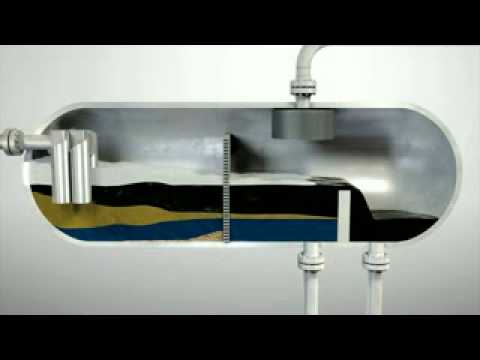

In [2]:
#@title Introduction to separation of oil and gas
#@markdown This video gives an intriduction to separation of oil and gas
from IPython.display import YouTubeVideo
YouTubeVideo('4AVdtGsU354', width=600, height=400)

## Gas separation equipment
Gas scrubbers are a very important part of a gas processing plant. Together with heat exchangers and compressors they form the hart of process for obtaining the hydrocarbon dew point specifications in an off-shore plant. The process diagram below highlights some of the heat exchangers and gas scrubbers used for obtaining the specified hydrocarbon dew point. 

The main purpose for a gas scrubber is to remove smaller amount of liquids from the gas. A vessel may be classified as a scrubber if the liquid amount is below 3-5 volume %. Vessels for larger liquid amounts will be classified as separators. A gas scrubber can have many purposes. One is as mention to actively remove liquid from the gas in combination with a cooler. The other main purpose is to protect other types of equipment in a process, for instance compressors (normally named suction drum) and contactors like dryers and CO2 removal unit. For these units the scrubber may be integrated in the bottom of the contactor. In distillation columns and contactors a gas scrubber (often called a demisting section) is also located in the top of the tower in order to remove droplets of absorber chemicals (like TEG and MDEA) from the gas again. 

##Design of a gas scrubber
The maximum velocity of a gas in a gas scrubber is calculate as:

$V_t=K\times\sqrt\frac{\rho_g-\rho_l}{\rho_g}$

The scrubber internal diameter can be calculated as

$Q=A\times V_t$ where $A= \frac{\pi}{4}\times D^2$

## Example: Design of a gas scrubber

A natural gas with some liquid condesate will be separated in a gas scubber. The gas flow rate is 10 MSm^3/day and the feed gas composition is as given in the python script below. The temperature and pressure of the stream is 35 C and 60 bara. Estimate the maximum gas velocity and minimum internal diameter of the gas scrubber based on a gas load factor of 0.1.

In [10]:

gas_flow = 10.0 #@param {type:"number"}
gas_pressure = 60.0 #@param {type:"number"}
gas_temperature = 35.0 #@param {type:"number"}
gas_load_factor = 0.1 #@param {type:"number"}

from neqsim.thermo import fluid
from neqsim import methods
from neqsim.process import clearProcess, heater, stream, runProcess

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("CO2", 2.0)
fluid1.addComponent("methane", 85.0)
fluid1.addComponent("ethane", 5.0)
fluid1.addComponent("propane", 3.0)
fluid1.addComponent("i-butane", 2.0)
fluid1.addComponent("n-butane", 2.0)
fluid1.addComponent("n-heptane", 22.0)
fluid1.setMixingRule('classic')
fluid1.setTemperature(gas_temperature, "C")
fluid1.setPressure(gas_pressure, "bara")
fluid1.setTotalFlowRate(gas_flow, "MSm3/day")

TPflash(fluid1)
fluid1.initPhysicalProperties()
flowRate = fluid1.getFlowRate("m3/sec")
gas_density = fluid1.getPhase("gas").getDensity("kg/m3")
oil_density = fluid1.getPhase("oil").getDensity("kg/m3")

V_t = gas_load_factor*math.sqrt((oil_density-gas_density)/gas_density)

A_scrub = flowRate/V_t

D_scrub = math.sqrt(A_scrub/(3.14/4.0))

print("gas density ", round(gas_density,3), " [kg/m3)]")
print("oil density ", round(oil_density,3), " [kg/m3]")
print("Maximum gas velocity ", round(V_t,3), " [m/sec]")
print("Minimum scrubber internal diameter ", round(D_scrub,3), " [m]")




gas density  49.016  [kg/m3)]
oil density  609.041  [kg/m3]
Maximum gas velocity  0.338  [m/sec]
Minimum scrubber internal diameter  2.367  [m]


Do the same example using water as liquid phase using the feed composition given inthe script below. Compare the results of separation of oil and water.

In [11]:
# Start by creating a fluid in neqsim
fluid2 = fluid("srk")  # create a fluid using the SRK-Eo
fluid2.addComponent("CO2", 2.0)
fluid2.addComponent("methane", 85.0)
fluid2.addComponent("ethane", 5.0)
fluid2.addComponent("propane", 3.0)
fluid2.addComponent("i-butane", 2.0)
fluid2.addComponent("n-butane", 2.0)
fluid2.addComponent("water", 22.0)
fluid2.setMixingRule(2)
fluid2.setTemperature(gas_temperature, "C")
fluid2.setPressure(gas_pressure, "bara")
fluid2.setTotalFlowRate(gas_flow, "MSm3/day")

TPflash(fluid2)
fluid2.initPhysicalProperties()
flowRate = fluid2.getFlowRate("m3/sec")
gas_density = fluid2.getPhase("gas").getDensity("kg/m3")
water_density = fluid2.getPhase("aqueous").getDensity("kg/m3")

V_t = gas_load_factor*math.sqrt((water_density-gas_density)/gas_density)

A_scrub = flowRate/V_t

D_scrub = math.sqrt(A_scrub/(3.14/4.0))

print("gas density ", round(gas_density,3), " [kg/m3)]")
print("water density ", round(water_density,3), " [kg/m3]")
print("Maximum gas velocity ", round(V_t,3), " [m/sec]")
print("Minimum scrubber internal diameter ", round(D_scrub,3), " [m]")

gas density  53.817  [kg/m3)]
water density  993.582  [kg/m3]
Maximum gas velocity  0.418  [m/sec]
Minimum scrubber internal diameter  2.143  [m]
